In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
# from IPython.html.widgets import FloatProgress
# from IPython.display import display
# import ipywidgets as widgets
import scipy.stats as ss

%matplotlib notebook

import plotly
import susipop as sp
import pylab

In [3]:
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
def sort_data(x,y):
    lists = sorted(itertools.izip(*[x, y]))
    new_x, new_y = list(itertools.izip(*lists))
    return new_x, new_y


In [4]:
def compare(phival,ydvals):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure()
    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear,nu,label=str(shearrate))
        except:
            continue
    plt.legend(loc="best")
    plt.title(f.split("/")[0].split("yd")[0])
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("viscosity Pa.s")
#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
    plt.savefig(name)

<IPython.core.display.Javascript object>


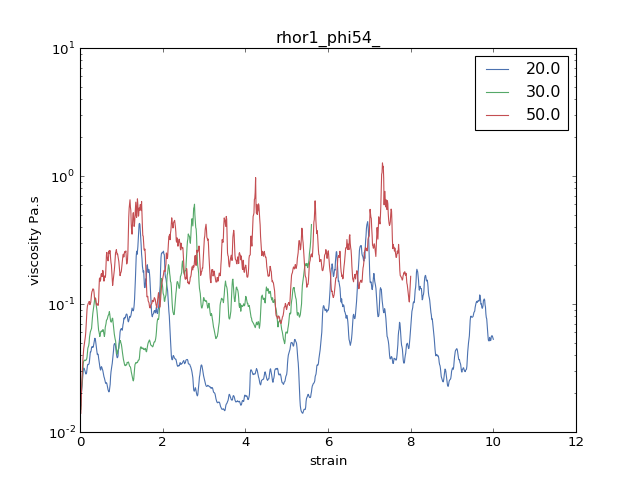

<IPython.core.display.Javascript object>


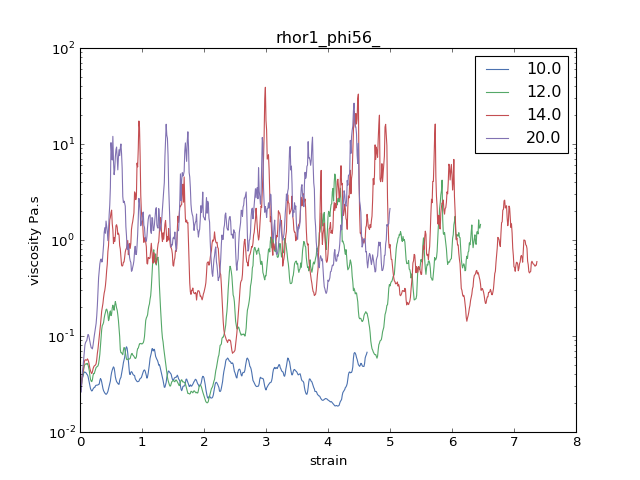

In [5]:
compare(54,[20, 30, 50])
compare(56,[10,12,14,20])

In [247]:
def plot_hist(phival, ydvals,bin_num=20):
    plt.figure(figsize=[13,5*(1+len(ydvals)/2)])
    plt.title("phival = "+str(phival))
    j = len(ydvals)
    for i,shearrate in enumerate(ydvals):
#         plt.figure(figsize=[10,10])
        try:
            plt.subplot(int(j/2.0)+1,2,i+1)
            exp = reader.DataSet("rhor1_phi"+str(phival)+"_yd"+str(float(shearrate)))
            exp.load_state(exp.tlist[-1])

            max_strain = float(exp.t)*exp.shearrate*exp.dt
            print max_strain
            n = len(exp.tlist[1:])
            if max_strain >= 1:
                n_last_strain = int(float(n)/max_strain)
                
            else:
                n_last_strain = 0

            n_last_strain = 50
            f = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
            db = pd.read_csv(f)
            nu = db[db.columns[2]][n_last_strain:]
            nu_rel = db[db.columns[4]][n_last_strain:]
            
            #==============================================
#             nu_rel = nu_rel/max(nu_rel)
            #==============================================
            print len(nu_rel)
            hist, bin_edges = np.histogram(nu_rel,bin_num, density=False)
#             hist = ss.relfreq(nu_rel,numbins=bin_num)
#             hist = hist.frequency*100.0
            hist = hist/float(len(nu))*100
            x = []
            for i in range(len(bin_edges)-1):
                x.append((bin_edges[i]+bin_edges[i+1])/2.0)
            poly_fit_hist = np.poly1d(np.polyfit(x, hist, 30))

            plt.plot(x,hist,'-g',label="yd="+str(shearrate)+" histogram")
            plt.plot(x,poly_fit_hist(x),'r',label="yd="+str(shearrate)+" polyfit")
#             plt.hist(nu_rel, bin_num,alpha=0.1,label="yd="+str(shearrate))
        except Exception as e:
            print e
            continue
        
#         plt.xlim([0,6000])
        plt.xlabel(" relative viscosity")
        plt.ylabel("percentage of datapoints in time series\nwith corresponding viscosity")
#         plt.xscale("log")
#         plt.yscale("log")
        plt.legend()

<IPython.core.display.Javascript object>


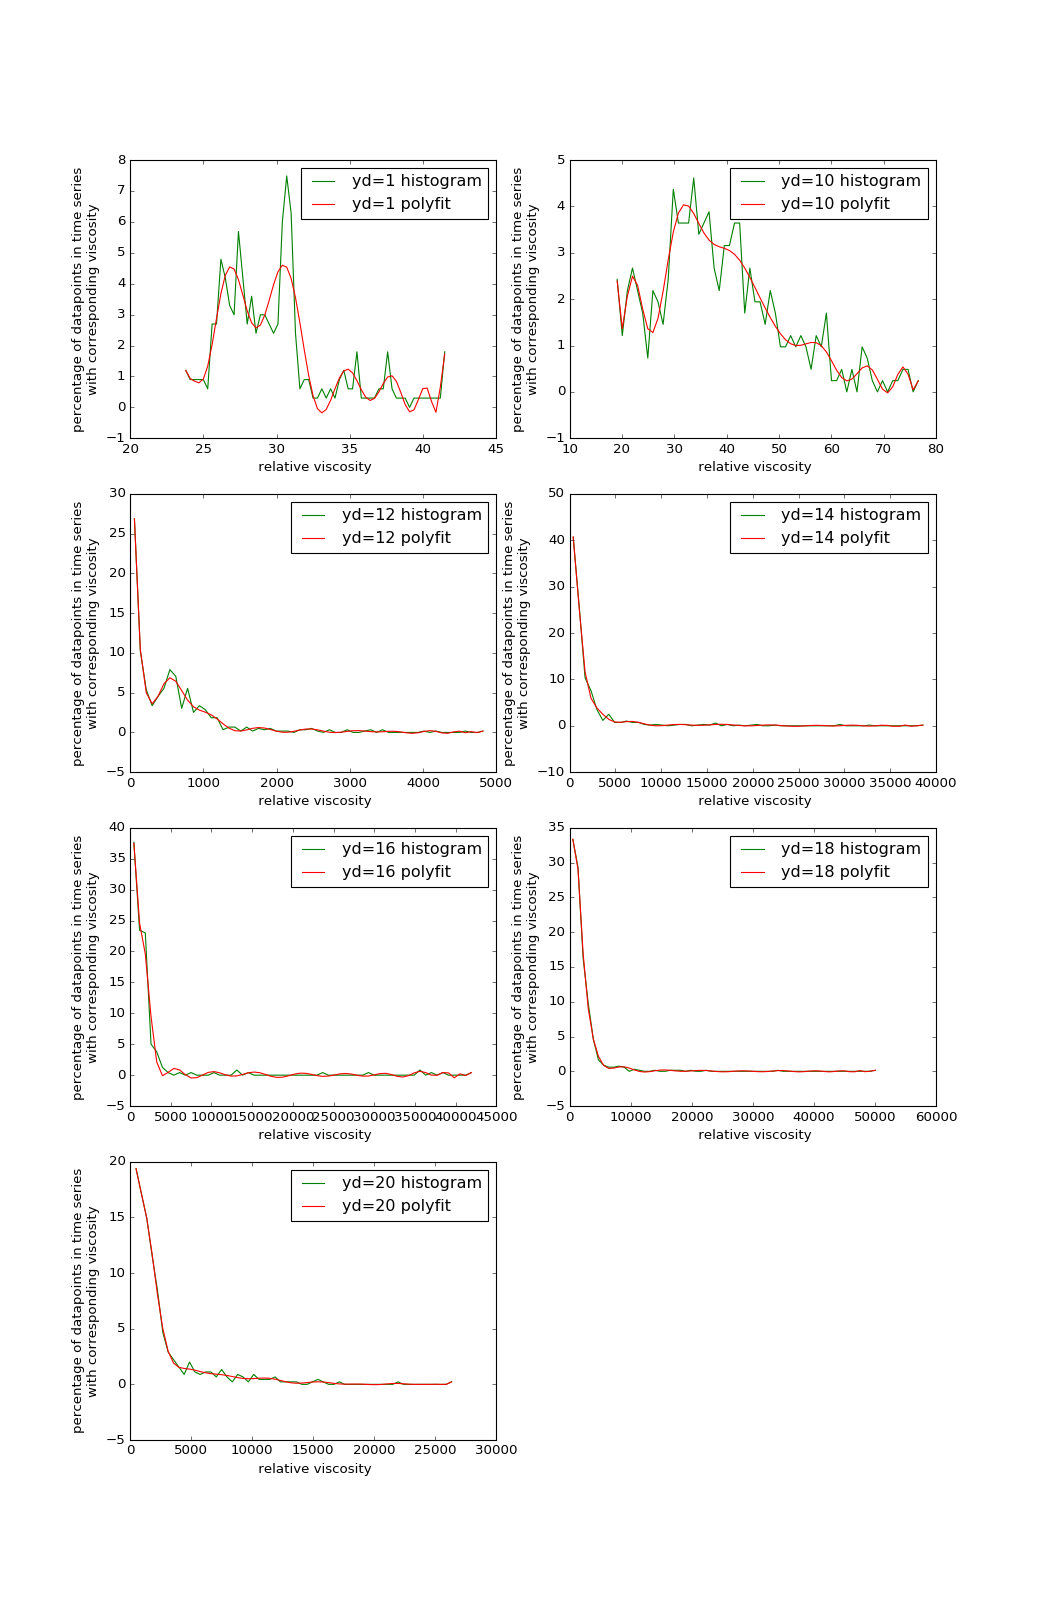

0.384999999999
334


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



4.62999999999
412


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



6.80999999999
595


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



7.85947704589
686


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



3.02040186293
239


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



7.98999999998
675


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



4.99999999999
449


/home/vsivadas/.local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RankWarning:

Polyfit may be poorly conditioned



In [248]:
plot_hist(56,[1,10,12,14,16,18,20],60)